In [36]:
!git clone https://github.com/phandaiduonghcb/CS114.L21

fatal: destination path 'CS114.L21' already exists and is not an empty directory.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [38]:
wecode=pd.read_csv('/content/CS114.L21/BTQT/17-5/wecode.csv')
score_training=pd.read_csv('/content/CS114.L21/BTQT/17-5/score_training.csv')
wecode.head(10)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


In [39]:
score_training.head(10)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [40]:
#Sort user_id
new_wecode = pd.DataFrame(wecode['user_id'])
#Sort problem da solved:
new_wecode['Sum_Problems_solved'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000) & (wecode['is_final'] == 1)))
#Sort số problem có submit
new_wecode['Sum_Problems_Submit'] = pd.DataFrame(wecode['is_final'])
#Sort submissions
new_wecode.insert(3,'Sum_submissions', 1)
#Sort submit đúng:
new_wecode['Sum_Correct_Submits'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000)))
#Sort pre_score của các submssion có is_final = 1 
new_wecode['Sum_Last_Scores'] = wecode.loc[wecode['is_final'] == 1, ['pre_score']]
#Tính tổng
new_wecode = new_wecode.groupby(['user_id']).sum()
new_wecode

,Sum_Problems_solved,Sum_Problems_Submit,Sum_submissions,Sum_Correct_Submits,Sum_Last_Scores
user_id,,,,,
1,1,2,2,1,10000.0
4,37,38,54,44,370000.0
5,3,5,6,3,30000.0
6,85,88,130,89,850000.0
7,0,2,5,0,9209.0
...,...,...,...,...,...
1860,28,48,76,29,329665.0
1862,4,6,12,4,40000.0
1864,28,63,187,30,439741.0


In [41]:
#Ý kiến nhóm 1:
new_wecode['N_1'] = new_wecode['Sum_Problems_solved'] / new_wecode['Sum_Problems_Submit'] 
# Ý kiến nhóm 2:
new_wecode['N_2'] = new_wecode['Sum_Problems_Submit'] / new_wecode['Sum_submissions']
# Ý kiến nhóm 3:
new_wecode['N_3'] = new_wecode['Sum_Correct_Submits'] / new_wecode['Sum_submissions']
#Ý kiến nhóm 5:
new_wecode['N_5'] = new_wecode['Sum_Last_Scores']
#Ý kiến nhóm 4:

# Ý kiến nhóm 6:
new_wecode['N_6a'] = new_wecode['Sum_Last_Scores']
new_wecode['N_6b'] = new_wecode['Sum_submissions']
new_wecode

,Sum_Problems_solved,Sum_Problems_Submit,Sum_submissions,Sum_Correct_Submits,Sum_Last_Scores,N_1,N_2,N_3,N_5,N_6a,N_6b
user_id,,,,,,,,,,,
1,1,2,2,1,10000.0,0.500000,1.000000,0.500000,10000.0,10000.0,2
4,37,38,54,44,370000.0,0.973684,0.703704,0.814815,370000.0,370000.0,54
5,3,5,6,3,30000.0,0.600000,0.833333,0.500000,30000.0,30000.0,6
6,85,88,130,89,850000.0,0.965909,0.676923,0.684615,850000.0,850000.0,130
7,0,2,5,0,9209.0,0.000000,0.400000,0.000000,9209.0,9209.0,5
...,...,...,...,...,...,...,...,...,...,...,...
1860,28,48,76,29,329665.0,0.583333,0.631579,0.381579,329665.0,329665.0,76
1862,4,6,12,4,40000.0,0.666667,0.500000,0.333333,40000.0,40000.0,12
1864,28,63,187,30,439741.0,0.444444,0.336898,0.160428,439741.0,439741.0,187


Ý kiến nhóm 4:

In [42]:
new_wecode1 = pd.DataFrame(wecode['assignment_id'])
new_wecode1['Problems'] = pd.DataFrame(wecode['problem_id'])
new_wecode1 = new_wecode1.groupby(['assignment_id'])['Problems'].nunique().reset_index()
new_wecode1

,assignment_id,Problems
0,0,352
1,5,4
2,7,10
3,8,8
4,10,7
...,...,...
285,376,10
286,377,7
287,381,4
288,383,47


In [43]:
new_wecode2 = pd.DataFrame(wecode['assignment_id'])
new_wecode2['user_id'] = pd.DataFrame(wecode['user_id'])
new_wecode2['Problems_Submit'] =  pd.DataFrame(wecode['problem_id'])
new_wecode2 = new_wecode2.groupby(['assignment_id', 'user_id']).nunique().reset_index()
new_wecode2

,assignment_id,user_id,Problems_Submit
0,0,1,2
1,0,4,41
2,0,6,85
3,0,7,2
4,0,11,8
...,...,...,...
12360,384,1442,3
12361,384,1513,3
12362,384,1620,3
12363,384,1685,3


In [44]:
wecode1 = pd.merge(new_wecode1, new_wecode2, how='inner', on='assignment_id')
wecode1 ['N_4'] = wecode1 ['Problems_Submit'] / wecode1 ['Problems']
wecode1

,assignment_id,Problems,user_id,Problems_Submit,N_4
0,0,352,1,2,0.005682
1,0,352,4,41,0.116477
2,0,352,6,85,0.241477
3,0,352,7,2,0.005682
4,0,352,11,8,0.022727
...,...,...,...,...,...
12360,384,4,1442,3,0.750000
12361,384,4,1513,3,0.750000
12362,384,4,1620,3,0.750000
12363,384,4,1685,3,0.750000


In [45]:
new_score_training=score_training[['id','CK']]
new_score_training.columns = ['user_id', 'CK']
new_score_training.head(10)

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
5,30,9
6,34,6.5
7,35,4.5
8,36,7
9,37,7.5


In [46]:
new_wecode4 = pd.DataFrame (wecode['user_id'])
new_wecode4['Problem_Submit'] =  pd.DataFrame(wecode['problem_id'])
new_wecode4['Start_Time'] =  pd.DataFrame(wecode['created_at'])
new_wecode4['End_Time'] =  pd.DataFrame(wecode['updated_at'])
new_wecode4['Start_Time'] = new_wecode4['Start_Time'].astype('datetime64[ns]')
new_wecode4['End_Time'] = new_wecode4['End_Time'].astype('datetime64[ns]')
new_wecode4['Time'] = new_wecode4['End_Time'] - new_wecode4['Start_Time']
#new_wecode4['Time'] = new_wecode4['Time'].astype('str')
new_wecode4.pop('Start_Time')
new_wecode4.pop('End_Time')
#new_wecode4 = new_wecode4.groupby(['user_id', 'Problem_Submit']).nunique().reset_index()
new_wecode4


,user_id,Problem_Submit,Time
0,4,3,0 days 00:00:08
1,4,4,0 days 00:00:08
2,4,5,0 days 00:15:35
3,4,5,0 days 00:00:01
4,4,5,0 days 00:00:01
...,...,...,...
264601,1796,25,0 days 00:00:07
264602,1796,25,0 days 00:00:01
264603,1796,25,0 days 00:00:06
264604,255,150,0 days 00:00:31


In [47]:
# Merge data với bộ dataset Wecode
training_data = pd.merge(new_wecode, new_score_training, how='inner', on='user_id')
training_data

,user_id,Sum_Problems_solved,Sum_Problems_Submit,Sum_submissions,Sum_Correct_Submits,Sum_Last_Scores,N_1,N_2,N_3,N_5,N_6a,N_6b,CK
0,24,72,77,164,80,750299.0,0.935065,0.469512,0.487805,750299.0,750299.0,164,9.5
1,27,3,5,13,4,39000.0,0.600000,0.384615,0.307692,39000.0,39000.0,13,10
2,29,72,80,199,75,762760.0,0.900000,0.402010,0.376884,762760.0,762760.0,199,8.5
3,34,81,84,218,81,822888.0,0.964286,0.385321,0.371560,822888.0,822888.0,218,6.5
4,35,145,151,297,152,1477000.0,0.960265,0.508418,0.511785,1477000.0,1477000.0,297,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,1856,23,31,64,23,270790.0,0.741935,0.484375,0.359375,270790.0,270790.0,64,7.5
849,1857,37,40,55,37,386000.0,0.925000,0.727273,0.672727,386000.0,386000.0,55,4
850,1859,3,30,31,3,39000.0,0.100000,0.967742,0.096774,39000.0,39000.0,31,1.5
851,1862,4,6,12,4,40000.0,0.666667,0.500000,0.333333,40000.0,40000.0,12,7.5


In [48]:
plot_data=training_data.sort_values(by='CK')
plot_data=plot_data.dropna()
plot_data

,user_id,Sum_Problems_solved,Sum_Problems_Submit,Sum_submissions,Sum_Correct_Submits,Sum_Last_Scores,N_1,N_2,N_3,N_5,N_6a,N_6b,CK
394,823,46,48,109,46,460000.0,0.958333,0.440367,0.422018,460000.0,460000.0,109,0
60,161,41,44,68,41,410000.0,0.931818,0.647059,0.602941,410000.0,410000.0,68,0
63,166,21,28,32,22,227000.0,0.750000,0.875000,0.687500,227000.0,227000.0,32,0
736,1529,15,18,41,15,173777.0,0.833333,0.439024,0.365854,173777.0,173777.0,41,0
87,222,23,28,65,23,230000.0,0.821429,0.430769,0.353846,230000.0,230000.0,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,1048,71,83,182,72,761719.0,0.855422,0.456044,0.395604,761719.0,761719.0,182,
503,1028,121,124,365,123,1235776.0,0.975806,0.339726,0.336986,1235776.0,1235776.0,365,
502,1026,90,93,359,90,916888.0,0.967742,0.259053,0.250696,916888.0,916888.0,359,
626,1325,93,101,380,94,942973.0,0.920792,0.265789,0.247368,942973.0,942973.0,380,


<function matplotlib.pyplot.show>

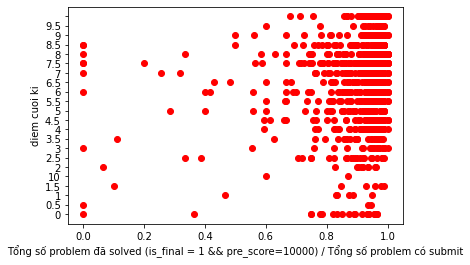

In [49]:
plt.scatter(x=plot_data['N_1'],y=plot_data['CK'],c='red')
plt.xlabel('Tổng số problem đã solved (is_final = 1 && pre_score=10000) / Tổng số problem có submit')
plt.ylabel('diem cuoi ki')
plt.show

<function matplotlib.pyplot.show>

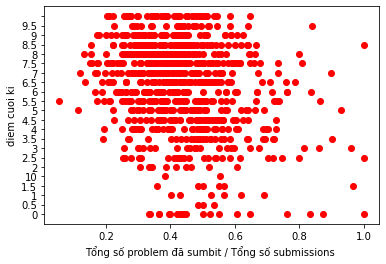

In [50]:
plt.scatter(x=plot_data['N_2'],y=plot_data['CK'],c='red')
plt.xlabel('Tổng số problem đã sumbit / Tổng số submissions ')
plt.ylabel('diem cuoi ki')
plt.show

<function matplotlib.pyplot.show>

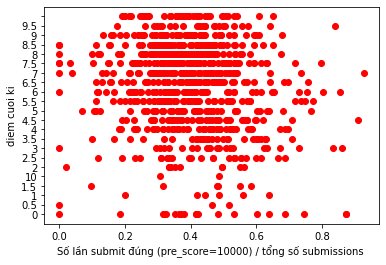

In [51]:
plt.scatter(x=plot_data['N_3'],y=plot_data['CK'],c='red')
plt.xlabel('Số lần submit đúng (pre_score=10000) / tổng số submissions ')
plt.ylabel('diem cuoi ki')
plt.show

<function matplotlib.pyplot.show>

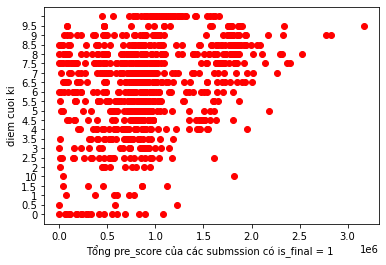

In [52]:
plt.scatter(x=plot_data['N_5'],y=plot_data['CK'],c='red')
plt.xlabel('Tổng pre_score của các submssion có is_final = 1 ')
plt.ylabel('diem cuoi ki')
plt.show

<function matplotlib.pyplot.show>

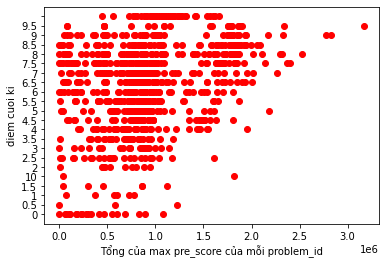

In [53]:
plt.scatter(x=plot_data['N_6a'],y=plot_data['CK'],c='red')
plt.xlabel('Tổng của max pre_score của mỗi problem_id')
plt.ylabel('diem cuoi ki')
plt.show

<function matplotlib.pyplot.show>

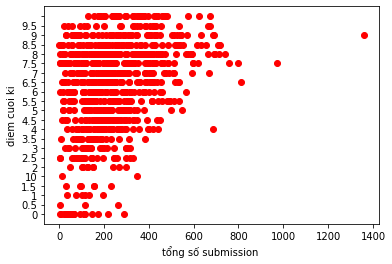

In [54]:
plt.scatter(x=plot_data['N_6b'],y=plot_data['CK'],c='red')
plt.xlabel('tổng số submission ')
plt.ylabel('diem cuoi ki')
plt.show

In [55]:
plot_data[:-5]

,user_id,Sum_Problems_solved,Sum_Problems_Submit,Sum_submissions,Sum_Correct_Submits,Sum_Last_Scores,N_1,N_2,N_3,N_5,N_6a,N_6b,CK
394,823,46,48,109,46,460000.0,0.958333,0.440367,0.422018,460000.0,460000.0,109,0
60,161,41,44,68,41,410000.0,0.931818,0.647059,0.602941,410000.0,410000.0,68,0
63,166,21,28,32,22,227000.0,0.750000,0.875000,0.687500,227000.0,227000.0,32,0
736,1529,15,18,41,15,173777.0,0.833333,0.439024,0.365854,173777.0,173777.0,41,0
87,222,23,28,65,23,230000.0,0.821429,0.430769,0.353846,230000.0,230000.0,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,1217,67,94,350,67,809691.0,0.712766,0.268571,0.191429,809691.0,809691.0,350,
571,1195,68,74,177,69,721665.0,0.918919,0.418079,0.389831,721665.0,721665.0,177,
562,1172,81,92,264,84,845648.0,0.880435,0.348485,0.318182,845648.0,845648.0,264,
558,1162,77,80,156,79,786888.0,0.962500,0.512821,0.506410,786888.0,786888.0,156,


In [69]:
X = plot_data[["N_2",'N_3','N_5' ,"N_6a",'N_6b']].to_numpy()

In [70]:
y = plot_data['CK'].to_numpy()
for i in range(len(y)):
  try:
    y[i]=float(y[i])
  except:
    y[i]=0

In [71]:
y = y.reshape((y.shape[0],-1))

In [65]:
#Normalize data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X)
X = std.transform(X)

In [72]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [77]:
y_train.shape

(570, 1)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

#Thử các model khác nhau của scikitlearn
reg = RandomForestRegressor().fit(X_train,y_train.reshape(-1))
predicted = reg.predict(X_test)
print(np.sqrt(mean_squared_error(predicted,y_test))/y_test.mean()*100) #Độ sai lệch


42.972520786635926


In [99]:
reg = LinearRegression().fit(X_train,y_train.reshape(-1))
predicted = reg.predict(X_test)
print(np.sqrt(mean_squared_error(predicted,y_test))/y_test.mean()*100) #Độ sai lệch

42.90225287286552


In [100]:
reg = GradientBoostingRegressor().fit(X_train,y_train.reshape(-1))
predicted = reg.predict(X_test)
print(np.sqrt(mean_squared_error(predicted,y_test))/y_test.mean()*100) #Độ sai lệch

42.00427938373326
